In [1]:
import pandas as pd
import numpy as np
import glob
import os
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
tsv_folder = "..\..\data.nosync\stats\head_movement"
sub_folders = ["ABIDEI","ABIDEII","ADHD200"]
# Collect all .tsv files
tsv_files = []
for folder in sub_folders:
    tsv_files = tsv_files + glob.glob(os.path.join(os.path.join(tsv_folder,folder), "*.tsv"))
    print(glob.glob(os.path.join(os.path.join(tsv_folder,folder), "*.tsv")))

['..\\..\\data.nosync\\stats\\head_movement\\ABIDEI\\sub-0050952_ses-1_task-rest_run-1_desc-summary_motion.tsv', '..\\..\\data.nosync\\stats\\head_movement\\ABIDEI\\sub-0050953_ses-1_task-rest_run-1_desc-summary_motion.tsv', '..\\..\\data.nosync\\stats\\head_movement\\ABIDEI\\sub-0050954_ses-1_task-rest_run-1_desc-summary_motion.tsv', '..\\..\\data.nosync\\stats\\head_movement\\ABIDEI\\sub-0050956_ses-1_task-rest_run-1_desc-summary_motion.tsv', '..\\..\\data.nosync\\stats\\head_movement\\ABIDEI\\sub-0050957_ses-1_task-rest_run-1_desc-summary_motion.tsv', '..\\..\\data.nosync\\stats\\head_movement\\ABIDEI\\sub-0050959_ses-1_task-rest_run-1_desc-summary_motion.tsv', '..\\..\\data.nosync\\stats\\head_movement\\ABIDEI\\sub-0050960_ses-1_task-rest_run-1_desc-summary_motion.tsv', '..\\..\\data.nosync\\stats\\head_movement\\ABIDEI\\sub-0050962_ses-1_task-rest_run-1_desc-summary_motion.tsv', '..\\..\\data.nosync\\stats\\head_movement\\ABIDEI\\sub-0050964_ses-1_task-rest_run-1_desc-summary_moti

In [3]:
len(tsv_files)

660

In [4]:
len(tsv_files)

660

In [5]:

# List to hold dataframes
subject_data = []

for tsv_file in tsv_files:
    try:
        df = pd.read_csv(tsv_file, sep='\t')
        row = df.iloc[0].copy()
        
        # Add subject ID 

        scan_id = os.path.split(tsv_file)[1].replace("task-rest_","").replace("_desc-summary_motion.tsv","")
        subject = scan_id.replace("sub-","").replace("_ses-1_run-1","").replace("_ses-1_run-2","")
        dataset = os.path.split(tsv_file)[0].replace("..\..\data.nosync\stats\head_movement\\","")

        subject = int(subject) # match the formatting 
        row["scan_id"] = scan_id
        row["Dataset"] = dataset
        row["Sub ID"] = subject
        subject_data.append(row)
    except Exception as e:
        print(f"Failed to read {tsv_file}: {e}")

# Combine all into one dataframe
motion_df = pd.DataFrame(subject_data)

# Reorder columns
cols = ['scan_id'] + ['Dataset'] + ['Sub ID']+ [col for col in motion_df.columns if col not in ['scan_id','Dataset',"Sub ID"]]
motion_df = motion_df[cols].reset_index(drop=True).convert_dtypes()

# Save to CSV
#combined_df.to_csv("motion_summary_all_subjects.csv", index=False)
motion_df.head(3)


scan_id Dataset  Sub ID  Mean_Relative_RMS_Displacement  \
0  sub-0050952_ses-1_run-1  ABIDEI   50952                        0.077949   
1  sub-0050953_ses-1_run-1  ABIDEI   50953                        0.012573   
2  sub-0050954_ses-1_run-1  ABIDEI   50954                        0.008208   

   Max_Relative_RMS_Displacement  Movements_gt_threshold  \
0                       1.330583                      23   
1                       0.068574                       0   
2                       0.054994                       0   

   Mean_Relative_Mean_Rotation  Mean_Relative_Maxdisp  Max_Relative_Maxdisp  \
0                     0.121919               0.405343                11.898   
1                      0.00933                0.03464                 0.243   
2                     0.005111               0.017857                 0.141   

   Max_Abs_Maxdisp  ...  Mean_Abs_Pitch  Mean_Abs_Yaw  Mean_Abs_dS-I  \
0           13.007  ...        0.316159      0.173124       0.145625   
1            0.706  ...        0.133591      0.025792       0.041716   
2            0.359  ...        0.079956      0.015102       0.014736   

   Mean_Abs_dL-R  Mean_Abs_dP-A  MeanFD_Power  MeanFD_Jenkinson  \
0       0.101051       0.119705       0.60198          0.359159   
1       0.035657       0.058771      0.098726          0.058804   
2       0.014437       0.043966      0.053991          0.029231   

   rootMeanSquareFD  FDquartile(top1/4thFD)  MeanDVARS  
0          0.599299                1.132589   2.793079  
1          0.242495                 0.10541   1.987881  
2           0.17097                0.057307   2.061108  

[3 rows x 39 columns]

In [6]:
#clean the label data
meta_df = pd.read_csv("..\..\data.nosync\phenotypic\meta_data.csv",index_col=0)
meta_df["Detailed_Label"] = meta_df["Co-Diagnosis"].fillna("Pure") + "+" + meta_df["Diagnosis"]
meta_df = meta_df.convert_dtypes()
meta_df.head(3)

Sub ID     Age     Sex   IQ Diagnosis Co-Diagnosis Dataset Detailed_Label
0   50952    8.74  Female  134       ASD         <NA>  ABIDEI       Pure+ASD
1   50953  11.764  Female  132       ASD         ADHD  ABIDEI       ADHD+ASD
2   50954   14.75  Female   78       ASD         <NA>  ABIDEI       Pure+ASD

In [7]:
Counter(meta_df["Co-Diagnosis"])

Counter({<NA>: 408, 'ADHD': 39, 'Other': 78})

In [8]:
Counter(meta_df["Detailed_Label"])

Counter({'Pure+ASD': 60,
         'ADHD+ASD': 39,
         'Other+ASD': 28,
         'Pure+TD': 239,
         'Pure+ADHD': 109,
         'Other+ADHD': 43,
         'Other+TD': 7})

In [9]:
meta_df["Label"] = meta_df["Detailed_Label"].replace("Pure\+","",regex=True).replace("Other\+","",regex=True)
Counter(meta_df["Label"])

Counter({'ASD': 88, 'ADHD+ASD': 39, 'TD': 246, 'ADHD': 152})

In [10]:
#join the label data
meta_df.head(3)

Sub ID     Age     Sex   IQ Diagnosis Co-Diagnosis Dataset Detailed_Label  \
0   50952    8.74  Female  134       ASD         <NA>  ABIDEI       Pure+ASD   
1   50953  11.764  Female  132       ASD         ADHD  ABIDEI       ADHD+ASD   
2   50954   14.75  Female   78       ASD         <NA>  ABIDEI       Pure+ASD   

      Label  
0       ASD  
1  ADHD+ASD  
2       ASD

In [11]:
meta_df.dtypes

Sub ID              Int64
Age               Float64
Sex                string
IQ                  Int64
Diagnosis          string
Co-Diagnosis       string
Dataset            string
Detailed_Label     string
Label              string
dtype: object

In [12]:
motion_df.head(3)

scan_id Dataset  Sub ID  Mean_Relative_RMS_Displacement  \
0  sub-0050952_ses-1_run-1  ABIDEI   50952                        0.077949   
1  sub-0050953_ses-1_run-1  ABIDEI   50953                        0.012573   
2  sub-0050954_ses-1_run-1  ABIDEI   50954                        0.008208   

   Max_Relative_RMS_Displacement  Movements_gt_threshold  \
0                       1.330583                      23   
1                       0.068574                       0   
2                       0.054994                       0   

   Mean_Relative_Mean_Rotation  Mean_Relative_Maxdisp  Max_Relative_Maxdisp  \
0                     0.121919               0.405343                11.898   
1                      0.00933                0.03464                 0.243   
2                     0.005111               0.017857                 0.141   

   Max_Abs_Maxdisp  ...  Mean_Abs_Pitch  Mean_Abs_Yaw  Mean_Abs_dS-I  \
0           13.007  ...        0.316159      0.173124       0.145625   
1            0.706  ...        0.133591      0.025792       0.041716   
2            0.359  ...        0.079956      0.015102       0.014736   

   Mean_Abs_dL-R  Mean_Abs_dP-A  MeanFD_Power  MeanFD_Jenkinson  \
0       0.101051       0.119705       0.60198          0.359159   
1       0.035657       0.058771      0.098726          0.058804   
2       0.014437       0.043966      0.053991          0.029231   

   rootMeanSquareFD  FDquartile(top1/4thFD)  MeanDVARS  
0          0.599299                1.132589   2.793079  
1          0.242495                 0.10541   1.987881  
2           0.17097                0.057307   2.061108  

[3 rows x 39 columns]

In [13]:
motion_df.dtypes

scan_id                            string
Dataset                            string
Sub ID                              Int64
Mean_Relative_RMS_Displacement    Float64
Max_Relative_RMS_Displacement     Float64
Movements_gt_threshold              Int64
Mean_Relative_Mean_Rotation       Float64
Mean_Relative_Maxdisp             Float64
Max_Relative_Maxdisp              Float64
Max_Abs_Maxdisp                   Float64
Max Relative_Roll                 Float64
Max_Relative_Pitch                Float64
Max_Relative_Yaw                  Float64
Max_Relative_dS-I                 Float64
Max_Relative_dL-R                 Float64
Max_Relative_dP-A                 Float64
Mean_Relative_Roll                Float64
Mean_Relative_Pitch               Float64
Mean_Relative_Yaw                 Float64
Mean_Relative_dS-I                Float64
Mean_Relative_dL-R                Float64
Mean_Relative_dP-A                Float64
Max_Abs_Roll                      Float64
Max_Abs_Pitch                     

In [14]:
motion_lab_df = pd.merge(meta_df,motion_df, on=["Sub ID","Dataset"], how="right",validate="1:m")
scans_df = pd.DataFrame(motion_lab_df.groupby(["Sub ID","Dataset"]).size(),columns=["Scans"])
motion_lab_df = pd.merge(motion_lab_df,scans_df, on=["Sub ID","Dataset"], how="left",validate="m:1")
motion_lab_df.head(3)

Sub ID     Age     Sex   IQ Diagnosis Co-Diagnosis Dataset Detailed_Label  \
0   50952    8.74  Female  134       ASD         <NA>  ABIDEI       Pure+ASD   
1   50953  11.764  Female  132       ASD         ADHD  ABIDEI       ADHD+ASD   
2   50954   14.75  Female   78       ASD         <NA>  ABIDEI       Pure+ASD   

      Label                  scan_id  ...  Mean_Abs_Yaw  Mean_Abs_dS-I  \
0       ASD  sub-0050952_ses-1_run-1  ...      0.173124       0.145625   
1  ADHD+ASD  sub-0050953_ses-1_run-1  ...      0.025792       0.041716   
2       ASD  sub-0050954_ses-1_run-1  ...      0.015102       0.014736   

   Mean_Abs_dL-R  Mean_Abs_dP-A  MeanFD_Power  MeanFD_Jenkinson  \
0       0.101051       0.119705       0.60198          0.359159   
1       0.035657       0.058771      0.098726          0.058804   
2       0.014437       0.043966      0.053991          0.029231   

   rootMeanSquareFD  FDquartile(top1/4thFD)  MeanDVARS  Scans  
0          0.599299                1.132589   2.793079      1  
1          0.242495                 0.10541   1.987881      1  
2           0.17097                0.057307   2.061108      1  

[3 rows x 47 columns]

In [15]:
Counter(motion_lab_df["Scans"])

Counter({1: 318, 2: 342})

In [16]:
Counter(meta_df["Detailed_Label"])

Counter({'Pure+ASD': 60,
         'ADHD+ASD': 39,
         'Other+ASD': 28,
         'Pure+TD': 239,
         'Pure+ADHD': 109,
         'Other+ADHD': 43,
         'Other+TD': 7})

In [17]:
Counter(motion_lab_df["Detailed_Label"])# there are more here but thats is because there are multiple sessions

Counter({'Pure+ASD': 57,
         'ADHD+ASD': 37,
         'Other+ASD': 23,
         'Pure+TD': 294,
         'Pure+ADHD': 165,
         'Other+ADHD': 72,
         'Other+TD': 12})

In [18]:
Counter(meta_df["Label"])

Counter({'ASD': 88, 'ADHD+ASD': 39, 'TD': 246, 'ADHD': 152})

In [19]:
Counter(motion_lab_df["Label"])

Counter({'ASD': 80, 'ADHD+ASD': 37, 'TD': 306, 'ADHD': 237})

In [20]:
cmap=plt.get_cmap('Accent')

In [21]:
np.unique(motion_lab_df["Label"])

array(['ADHD', 'ADHD+ASD', 'ASD', 'TD'], dtype=object)

In [133]:
def scatter_motion(col_name:str = 'Mean_Relative_RMS_Displacement',cats_by = "Label"):   
    colours = ["violet","darkblue","red","gold","purple","black","orange","limegreen"]
    category_mapping = {category: colours[idx] for idx, category in enumerate(np.unique(motion_lab_df[cats_by]))}
    fig, (ax,ax2) = plt.subplots(1,2,figsize=(8, 3))
    for label in np.unique(motion_lab_df[cats_by]):
        category_numbers = [category_mapping[cat] for cat in  motion_lab_df[cats_by][motion_lab_df[cats_by]==label]]
        ax2.scatter(motion_lab_df["Age"][motion_lab_df[cats_by]==label],np.log(motion_lab_df[col_name][motion_lab_df[cats_by]==label]),s=2,alpha = 0.5, c = category_numbers,label=label)
        ax.scatter(motion_lab_df["Age"][motion_lab_df[cats_by]==label],motion_lab_df[col_name][motion_lab_df[cats_by]==label],s=2,alpha = 0.5, c = category_numbers,label=label)

    ax.legend()  
    ax.set_title(col_name)  
    ax2.set_title("log y axis")  

    fig.show();


C:\Users\nici9\AppData\Local\Temp\ipykernel_1048\4022618253.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


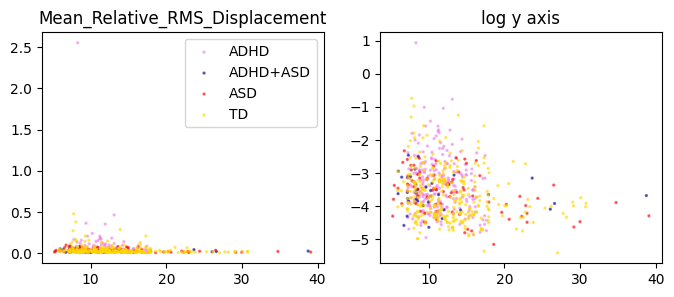

In [134]:
scatter_motion('Mean_Relative_RMS_Displacement')

C:\Users\nici9\AppData\Local\Temp\ipykernel_1048\4022618253.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();
C:\Users\nici9\AppData\Local\Temp\ipykernel_1048\4022618253.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax,ax2) = plt.subplots(1,2,figsize=(8, 3))


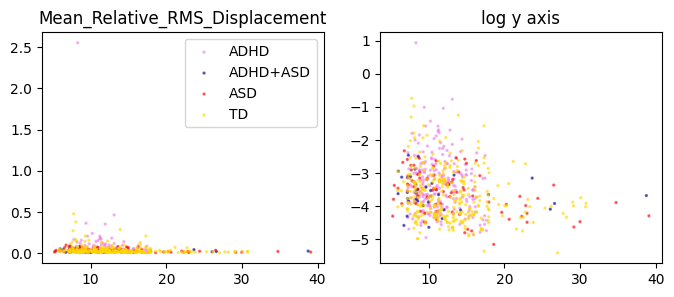

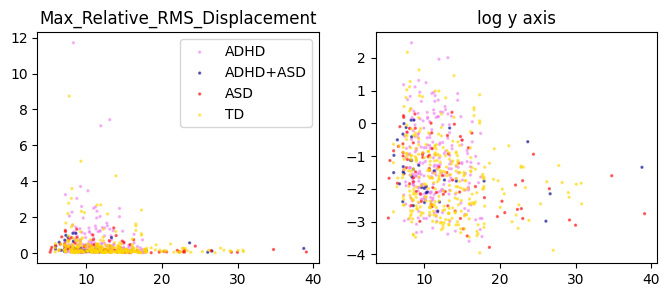

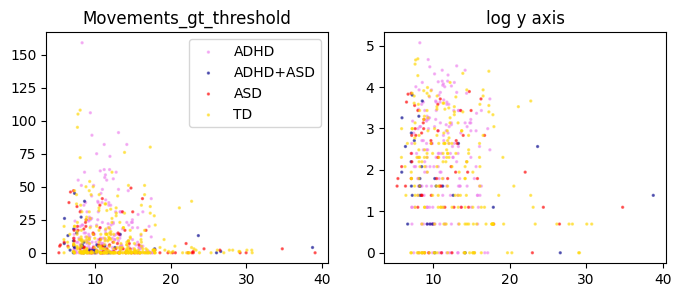

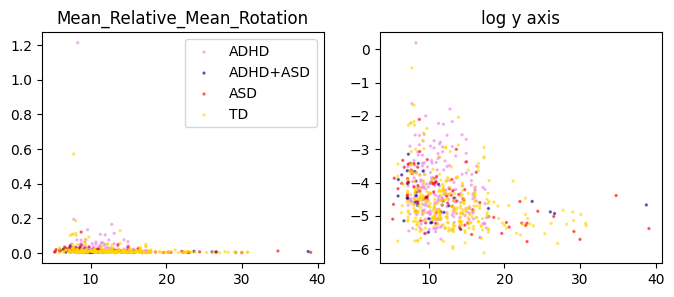

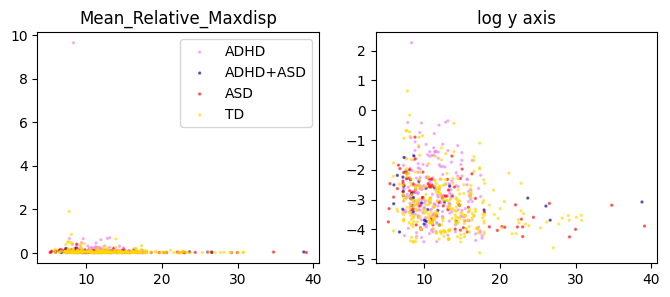

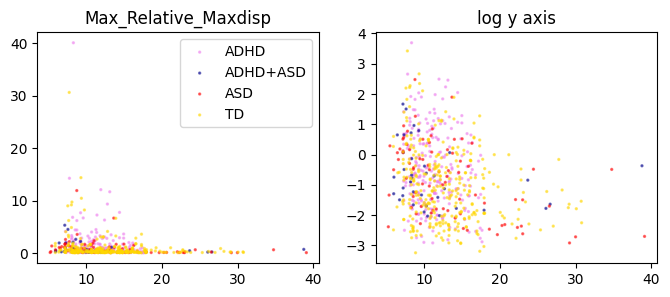

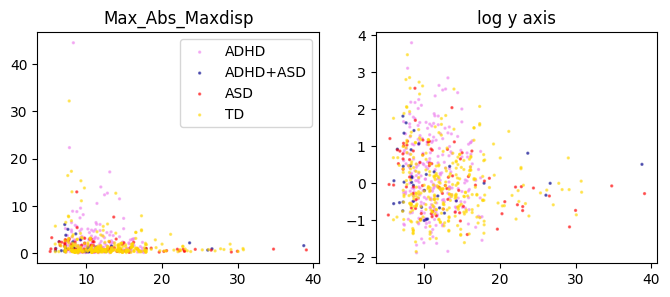

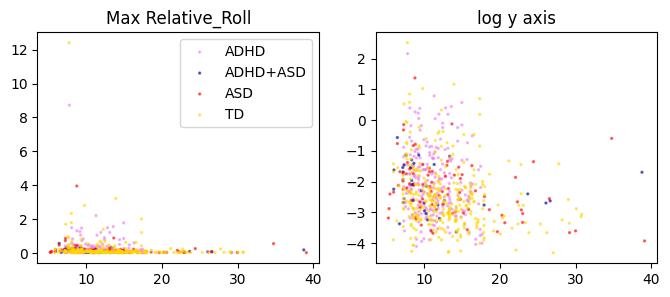

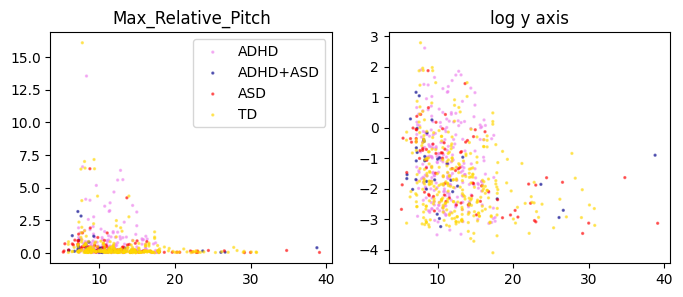

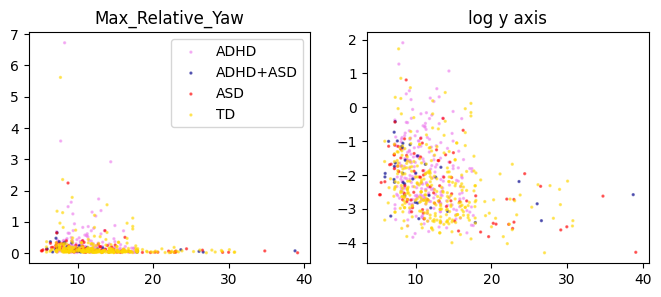

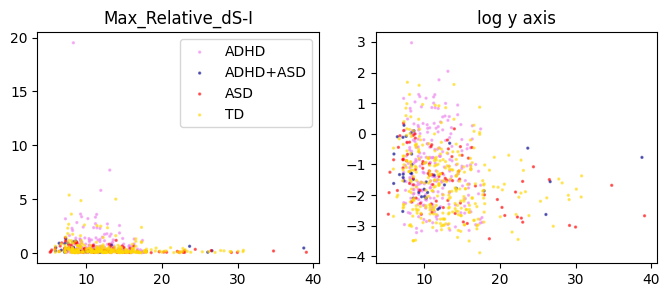

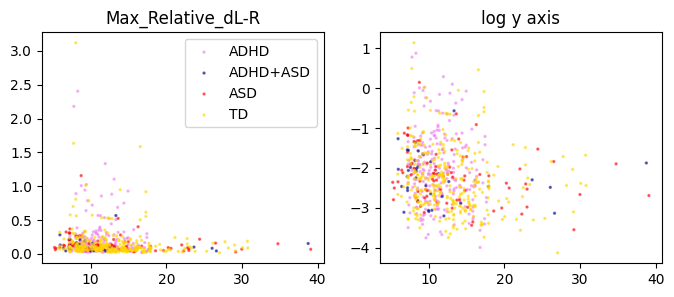

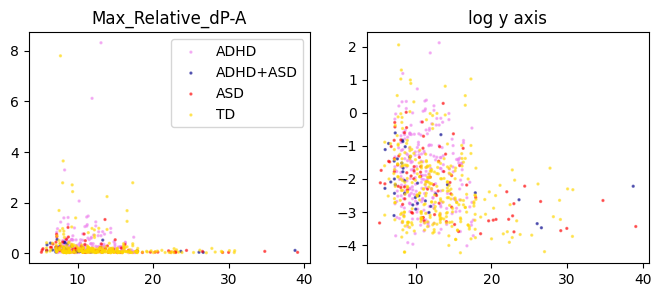

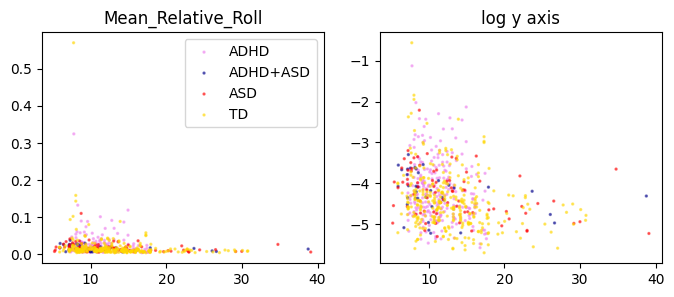

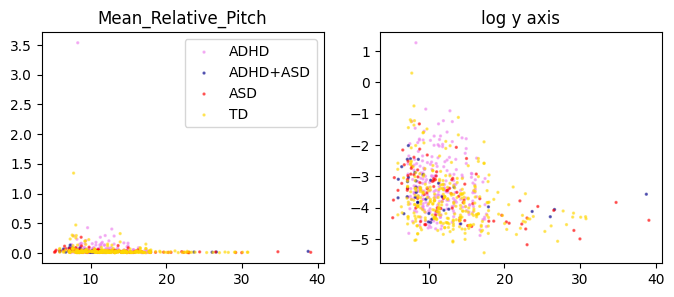

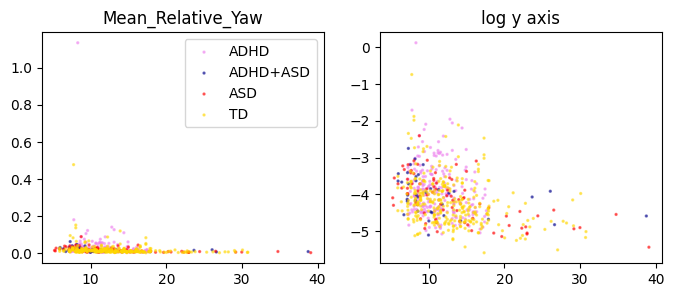

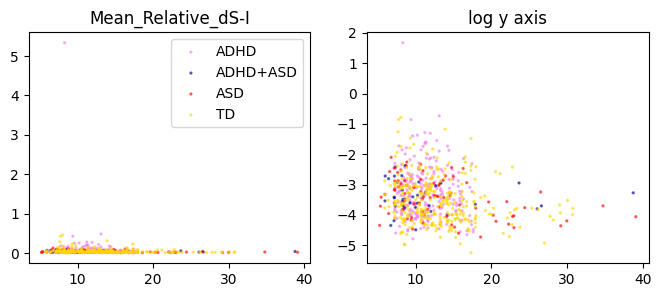

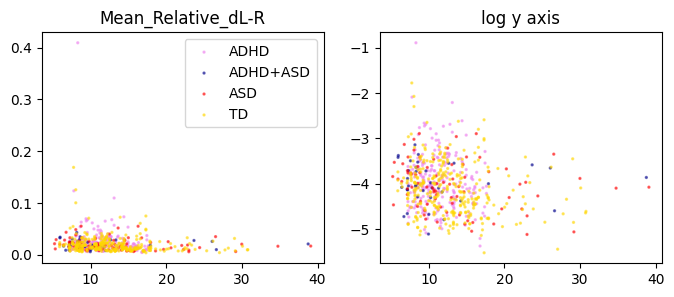

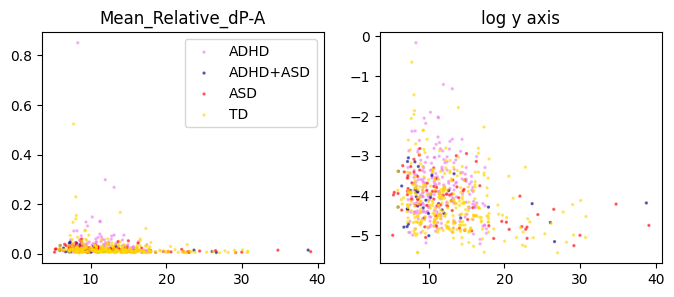

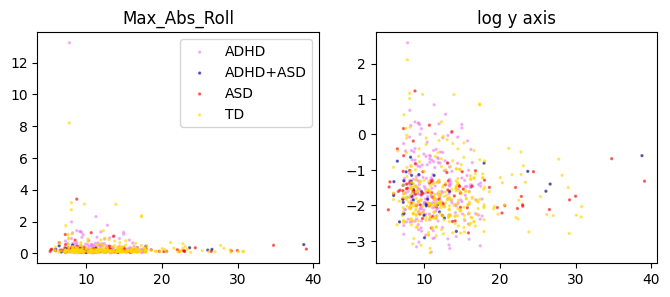

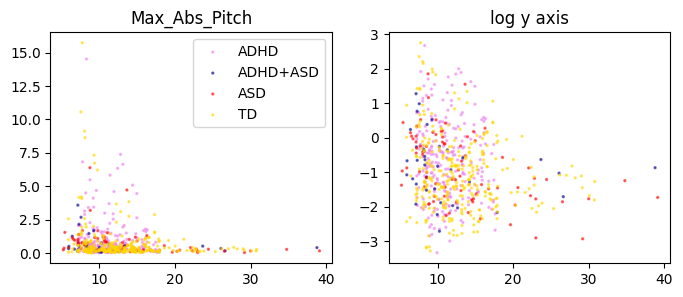

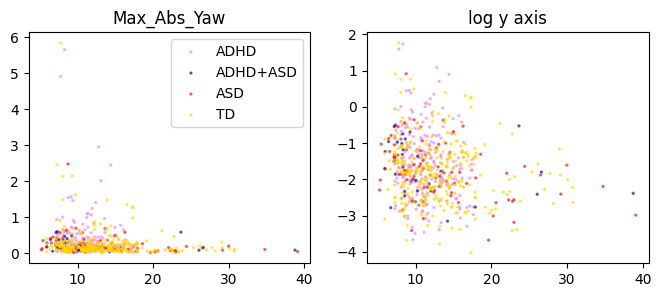

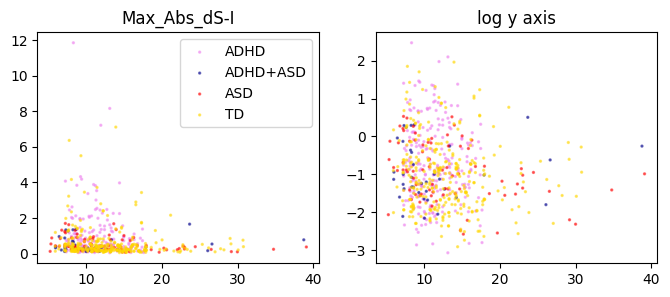

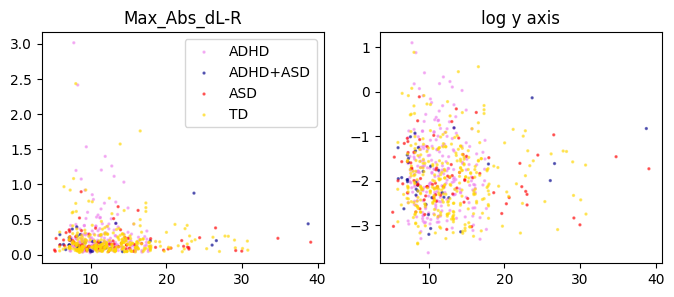

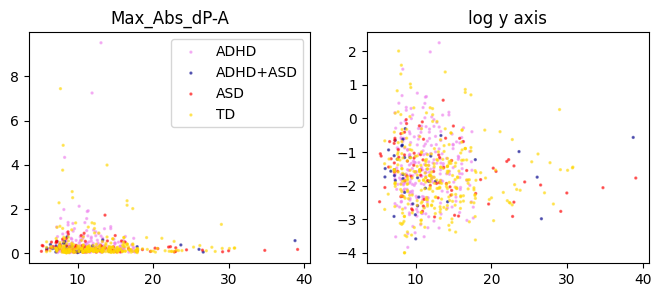

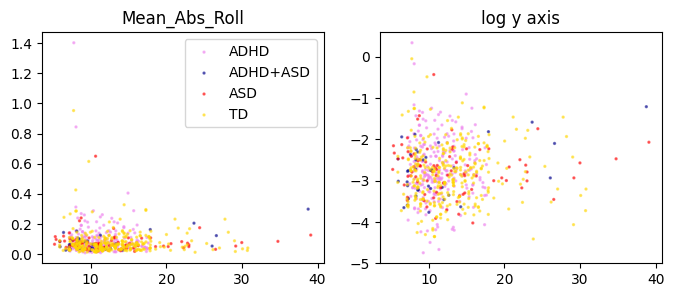

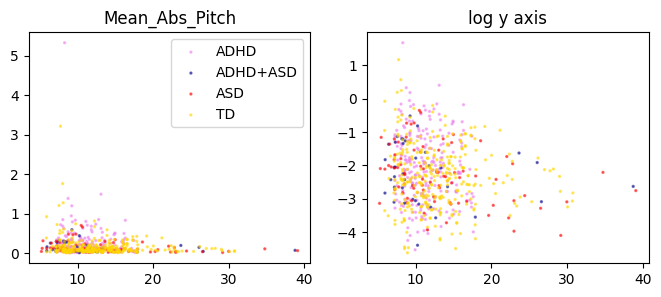

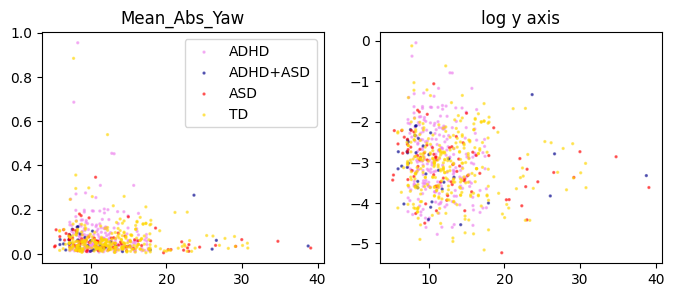

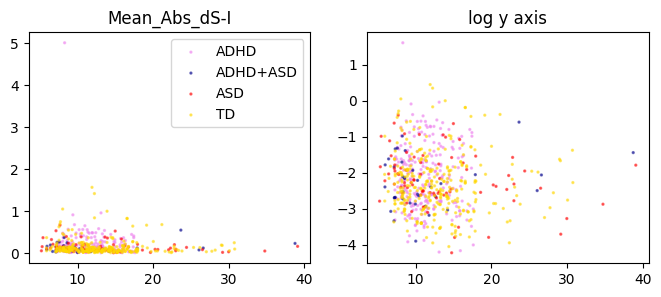

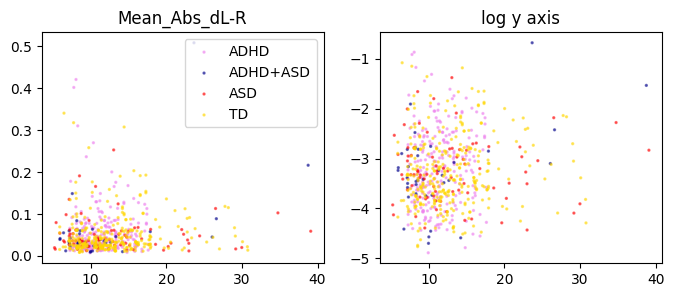

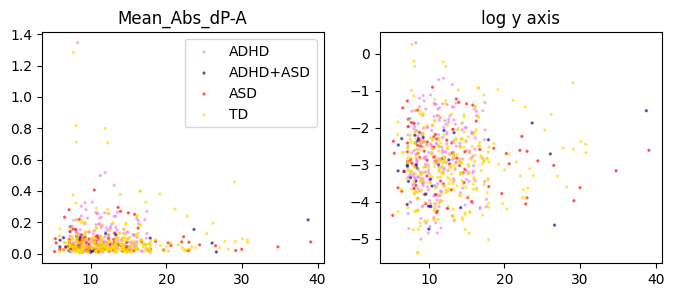

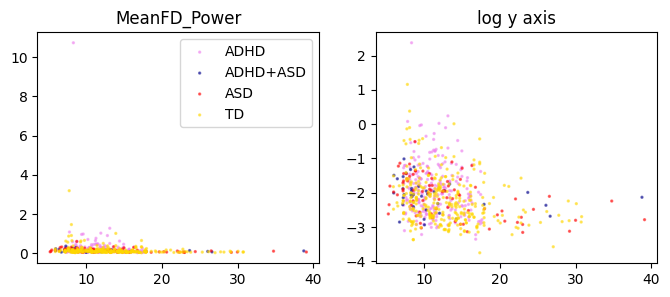

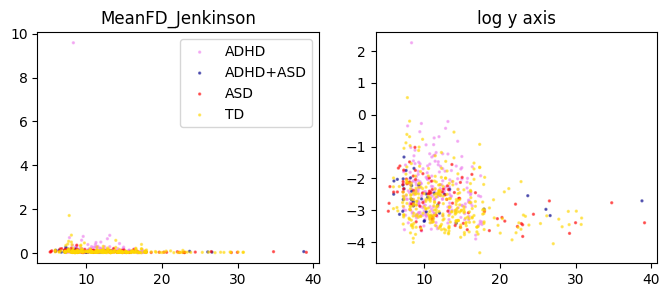

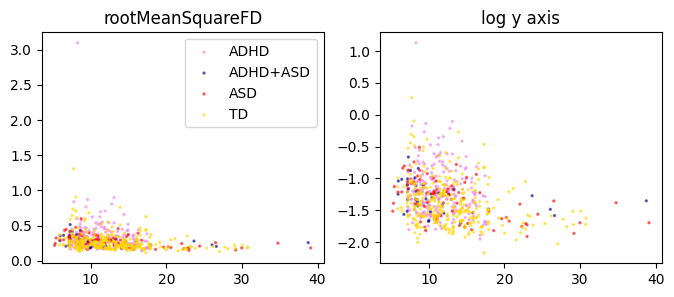

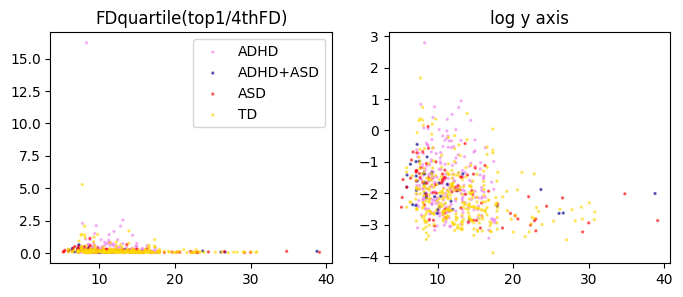

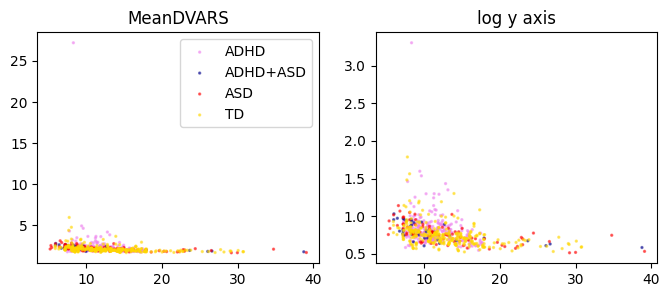

In [135]:
for column in motion_df.columns[3:]:
    scatter_motion(column)

C:\Users\nici9\AppData\Local\Temp\ipykernel_1048\4022618253.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();
C:\Users\nici9\AppData\Local\Temp\ipykernel_1048\4022618253.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax,ax2) = plt.subplots(1,2,figsize=(8, 3))


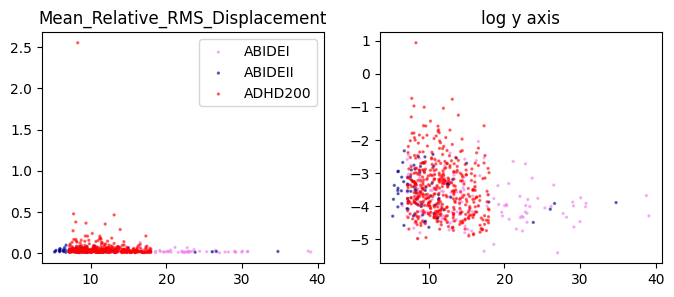

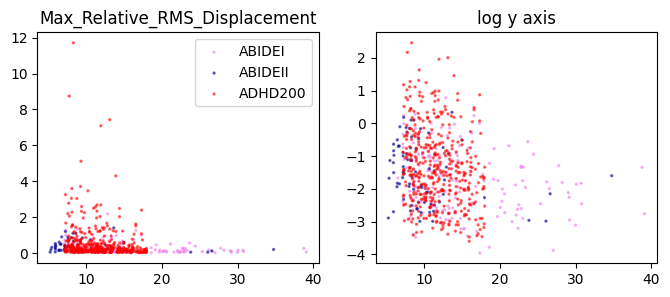

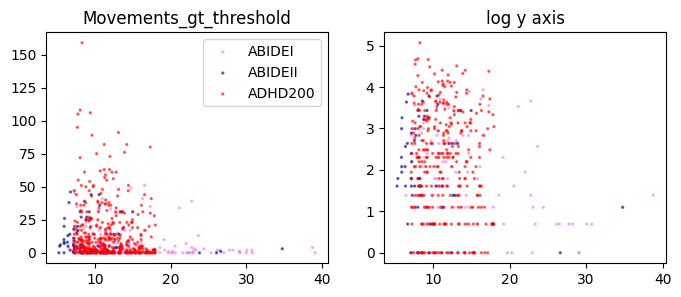

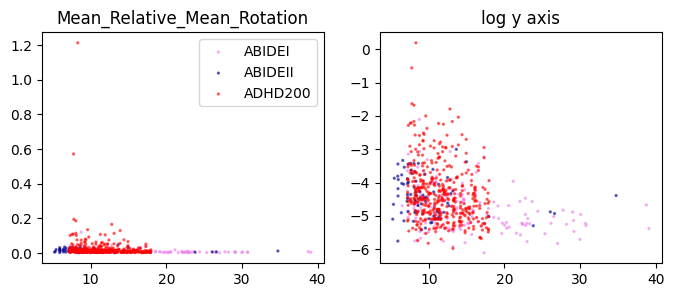

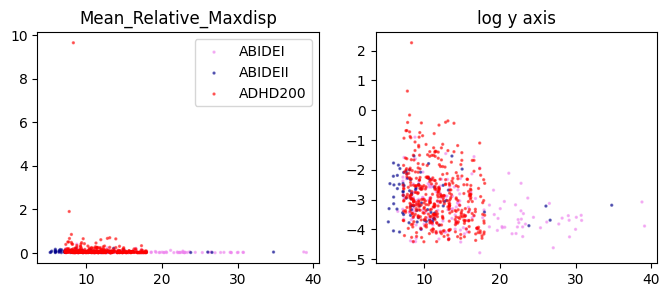

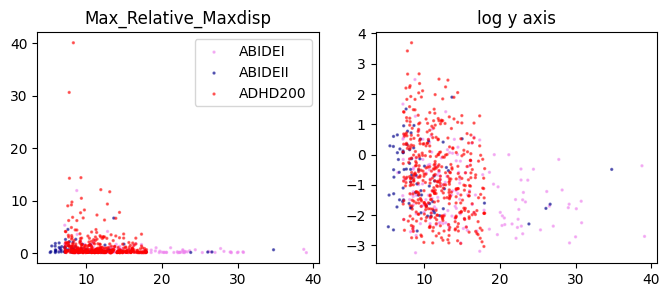

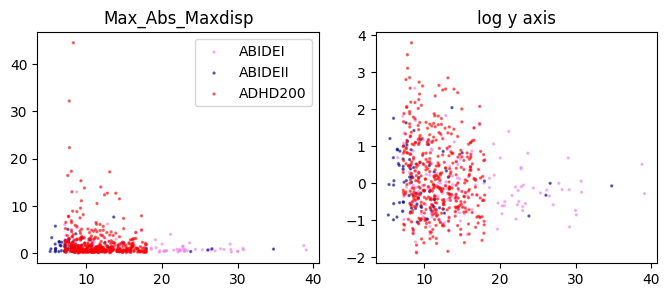

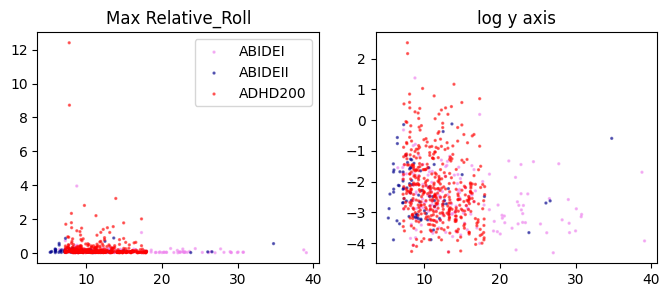

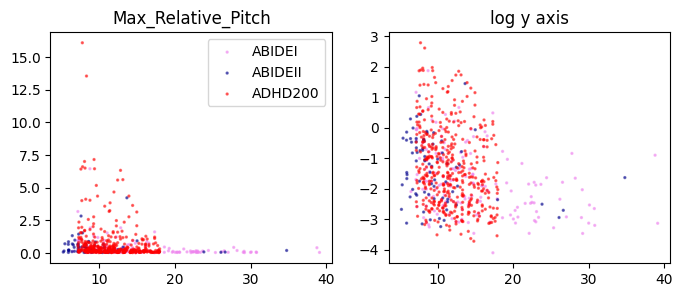

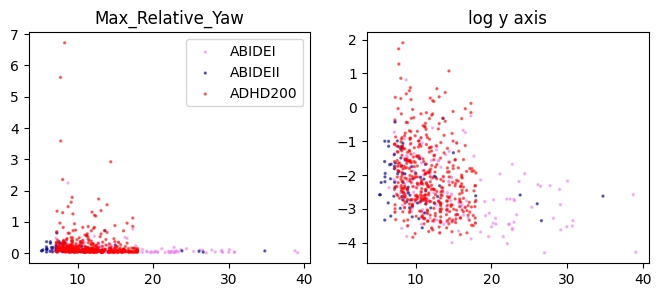

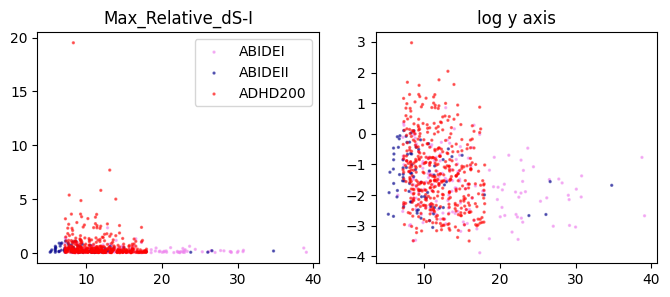

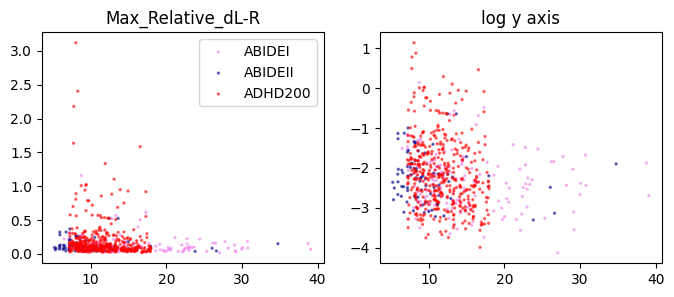

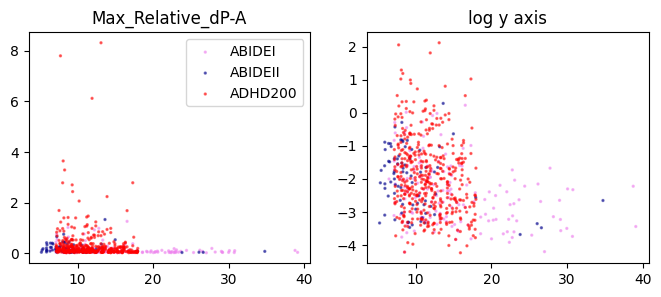

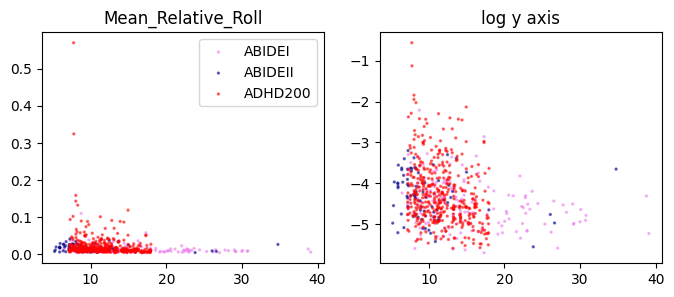

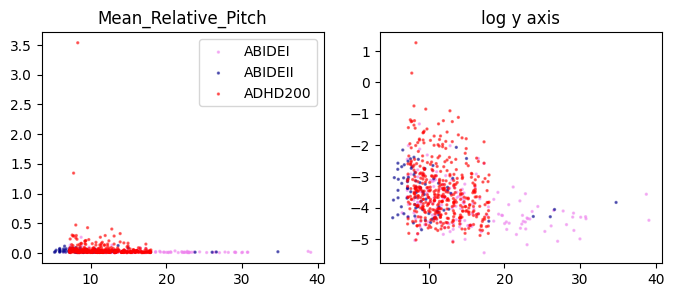

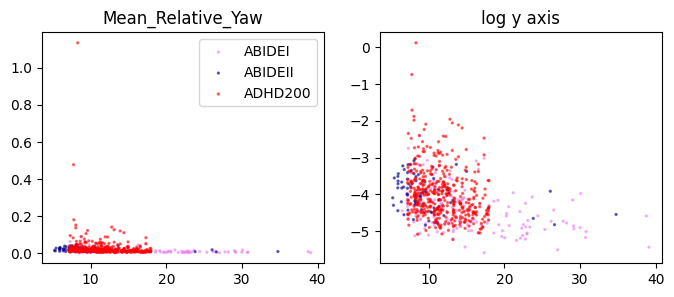

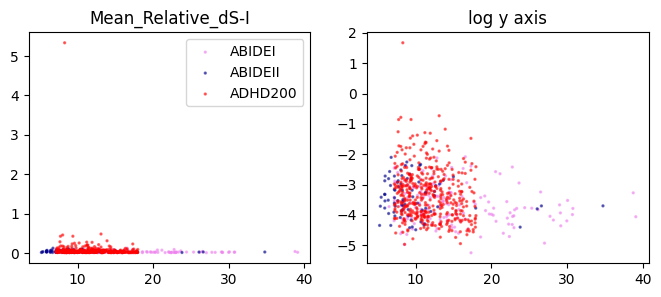

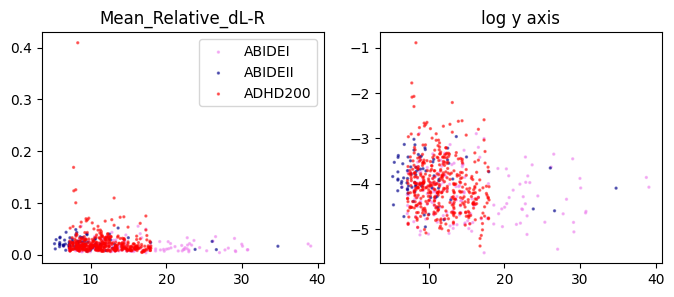

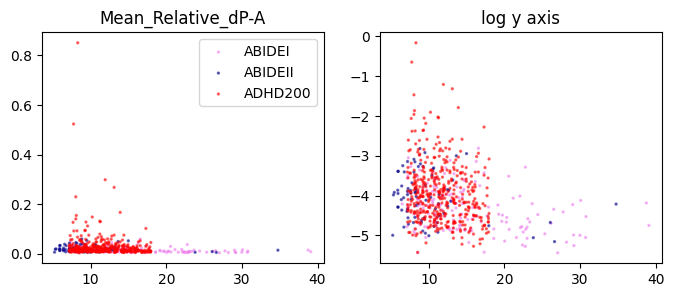

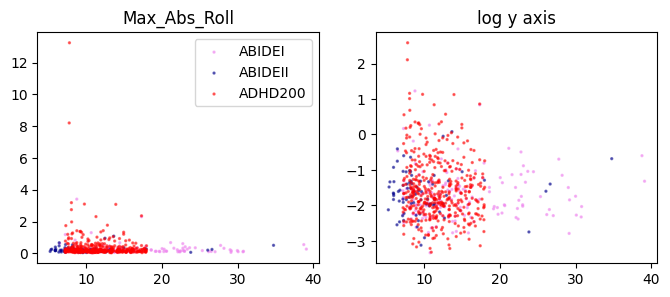

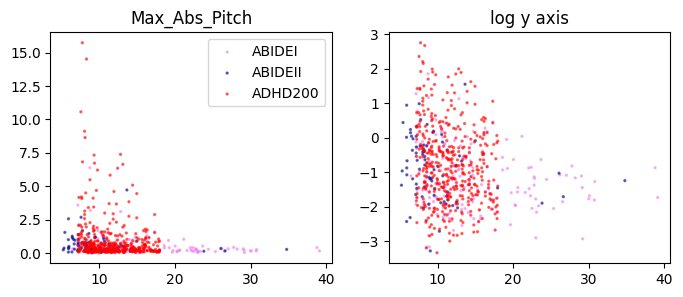

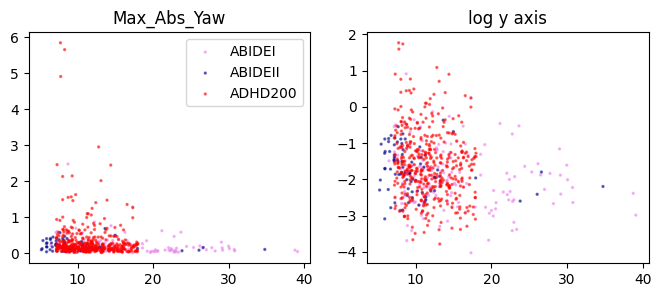

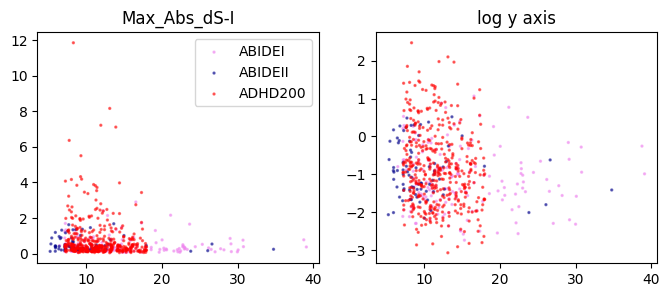

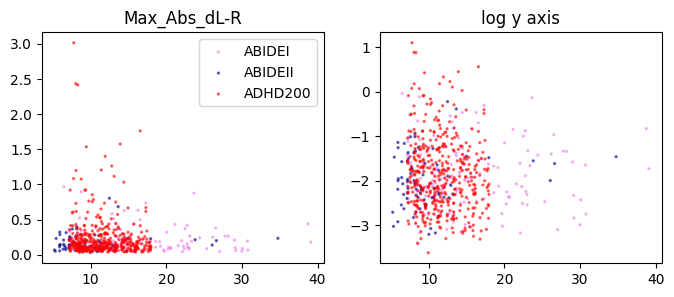

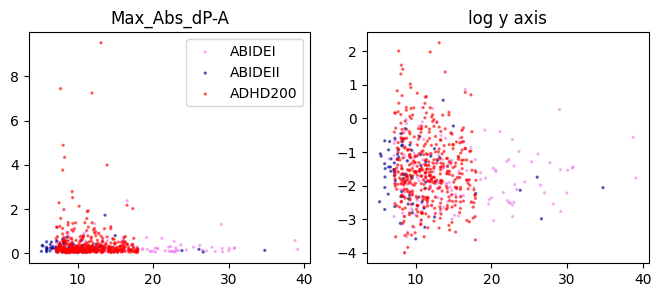

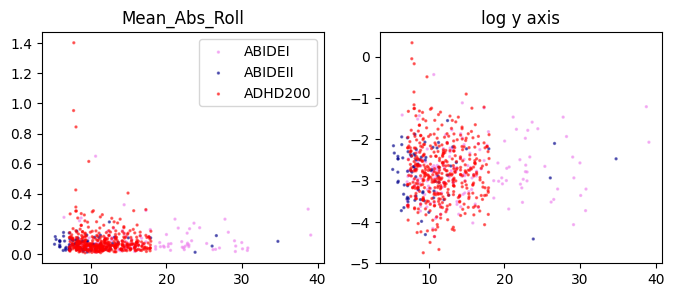

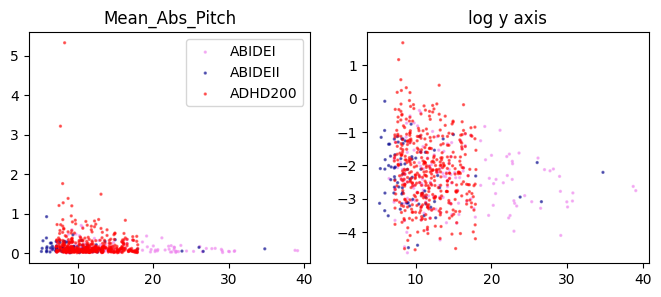

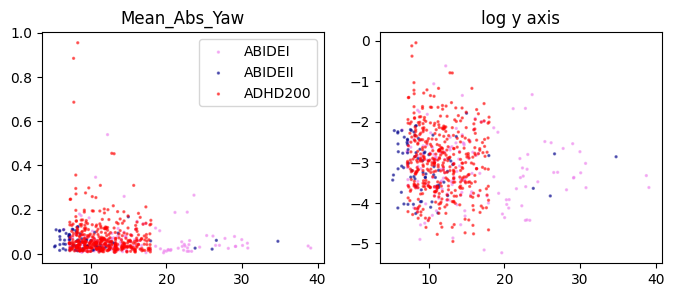

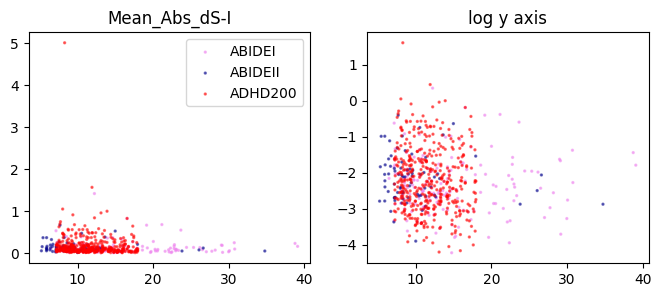

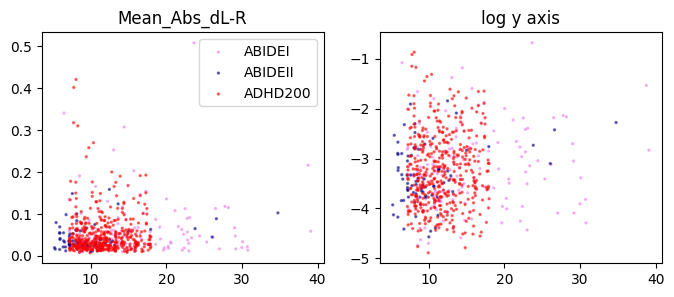

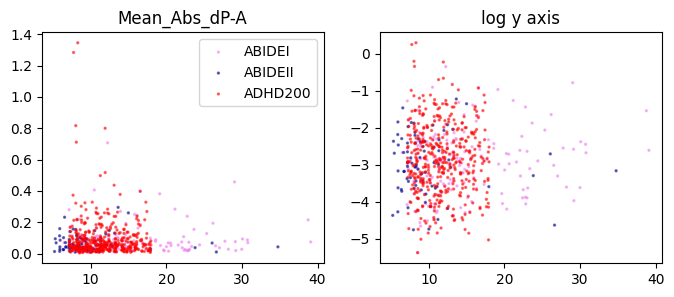

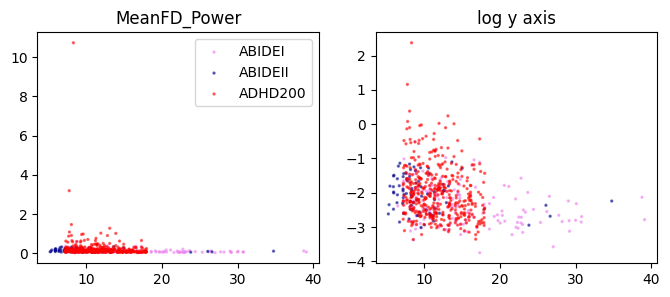

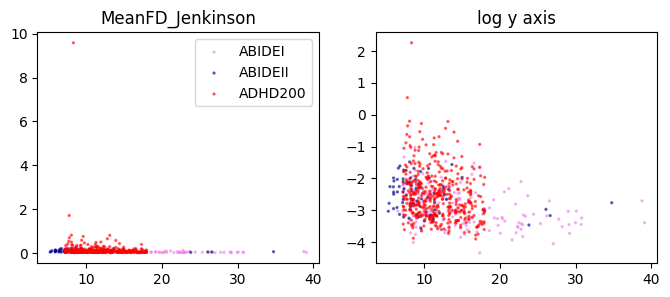

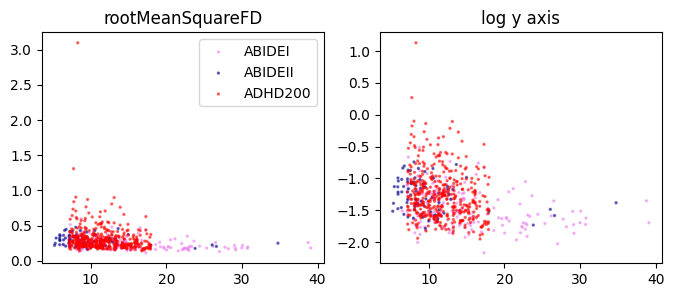

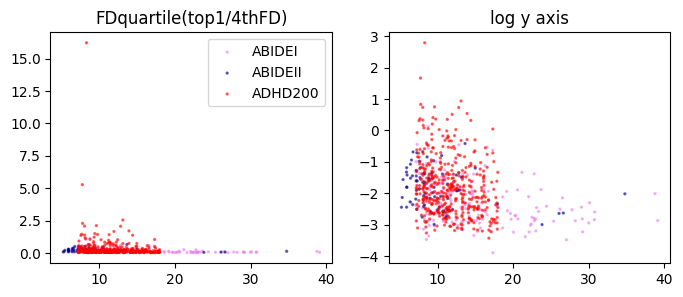

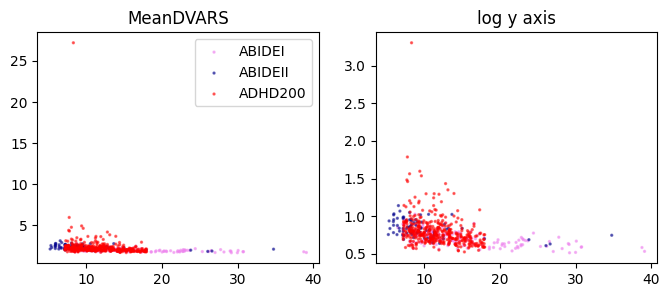

In [136]:
for column in motion_df.columns[3:]:
    scatter_motion(column,cats_by="Dataset")

In [86]:
# for column in motion_df.columns[3:]:
#     scatter_motion(column,cats_by="Detailed_Label")

more head motion in younger people, as expected

the ADHD 200 data is lower quality in terms of head motion statistics